<a href="https://colab.research.google.com/github/itsrajarshi/Software_Engineering_Lab_SEM5/blob/main/SE_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas openpyxl


In [ ]:
import numpy as np

# Data points (hour, temperature)
x1, y1 = 6, 20
x2, y2 = 12, 32
x3, y3 = 20, 22



In [ ]:
# Set up the system of equations:
# a*x^2 + b*x + c = y
A = np.array([
    [x1**2, x1, 1],
    [x2**2, x2, 1],
    [x3**2, x3, 1]
])

Y = np.array([y1, y2, y3])

# Solve for [a, b, c]
coefficients = np.linalg.solve(A, Y)
a, b, c = coefficients

print(f"Quadratic model: y = {a:.3f}x² + {b:.3f}x + {c:.3f}")

Quadratic model: y = -0.232x² + 6.179x + -8.714


In [ ]:
def predict_temperature(hour):
    return a*hour**2 + b*hour + c

# Example: predict temperature at
hour = 12
predicted_temp = predict_temperature(hour)
print(f"Predicted temperature at {hour}:00 is {predicted_temp:.2f}°C")


Predicted temperature at 12:00 is 32.00°C


In [ ]:
import numpy as np
import csv

# Only import `files` if running in Colab / Notebook
try:
    from google.colab import files
    import io
    COLAB = True
except ImportError:
    COLAB = False

# 🔷 Input Module
def get_keyboard_input(param_name):
    data = []
    print(f"\nEnter 3 observations for {param_name}:")
    while len(data) < 3:
        try:
            x = int(input(f"  Hour {len(data)+1} (0-23): "))
            if x < 0 or x > 23:
                print("    Invalid hour. Must be between 0 and 23.")
                continue
            y = float(input(f"  Value {len(data)+1}: "))
            data.append((x, y))
        except ValueError:
            print("    Invalid input. Please enter numbers.")
    return data

def get_file_input_from_upload():
    if not COLAB:
        print("❌ File upload only works in Google Colab or Jupyter notebooks with `google.colab`.")
        return None, None, None

    print("\n📂 Please upload a CSV file with columns: Parameter, Hour, Value")
    uploaded = files.upload()
    filename = next(iter(uploaded))  # Get uploaded file name

    data = {"Temperature": [], "Humidity": [], "Rainfall": []}
    try:
        file_content = io.StringIO(uploaded[filename].decode("utf-8"))
        reader = csv.reader(file_content)
        header = next(reader)  # Skip header
        for row in reader:
            param = row[0].strip()
            hour = int(row[1])
            value = float(row[2])
            data[param].append((hour, value))
        print(f"✅ Successfully read file: {filename}")
        return data["Temperature"], data["Humidity"], data["Rainfall"]
    except Exception as e:
        print(f"❌ Error reading uploaded file: {e}")
        return None, None, None

def get_hardcoded_data():
    temp_data = [(6, 20), (12, 32), (20, 22)]
    hum_data = [(6, 85), (12, 55), (20, 70)]
    rain_data = [(6, 0), (12, 2), (20, 1)]
    print("\n✅ Using hardcoded sample data.")
    return temp_data, hum_data, rain_data

# 🔷 Processing Module
def compute_coefficients(data):
    A = np.array([[x**2, x, 1] for x, _ in data])
    Y = np.array([y for _, y in data])
    return np.linalg.solve(A, Y)

def predict(hour, coeffs):
    a, b, c = coeffs
    return a*hour**2 + b*hour + c

# 🔷 Output Module
def display_equation(param_name, coeffs):
    a, b, c = coeffs
    print(f"\n{param_name} Model: y = {a:.4f}x² + {b:.4f}x + {c:.4f}")

def display_prediction(hour, temp, hum, rain):
    print(f"\n📊 Predicted Weather at {hour:02d}:00")
    print("----------------------------------------")
    print(f"Temperature : {temp:.2f} °C")
    print(f"Humidity    : {hum:.2f} %")
    print(f"Rainfall    : {rain:.2f} mm/hr")

def display_full_forecast(temp_c, hum_c, rain_c):
    print("\n🌦️ Hourly Forecast (0–23):")
    print("----------------------------------------")
    print(f"{'Hour':<6}{'Temp(°C)':<12}{'Humidity(%)':<15}{'Rain(mm/hr)':<12}")
    for hour in range(24):
        t = predict(hour, temp_c)
        h = predict(hour, hum_c)
        r = predict(hour, rain_c)
        print(f"{hour:02d}    {t:8.2f}     {h:10.2f}         {r:8.2f}")

def save_forecast_to_csv(temp_c, hum_c, rain_c, filename="forecast.csv"):
    with open(filename, "w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(["Hour", "Temperature(°C)", "Humidity(%)", "Rainfall(mm/hr)"])
        for hour in range(24):
            t = predict(hour, temp_c)
            h = predict(hour, hum_c)
            r = predict(hour, rain_c)
            writer.writerow([hour, f"{t:.2f}", f"{h:.2f}", f"{r:.2f}"])
    print(f"\n✅ Full forecast saved to '{filename}'.")

# 🔷 Main Program
print("\n=====================================")
print("      🌦️ Weather Modeling System")
print("      (Quadratic Polynomial Model)")
print("=====================================")

while True:  # Main loop for input mode
    print("\nSelect Input Mode:")
    print("1. Hardcoded sample data")
    print("2. User keyboard input")
    print("3. Upload CSV file (Colab/Jupyter only)")
    print("4. Exit program")
    mode = input("Enter your choice (1/2/3/4): ")

    if mode == "4":
        print("\n👋 Exiting. Thank you!")
        break

    if mode == "1":
        temp_data, hum_data, rain_data = get_hardcoded_data()
    elif mode == "2":
        temp_data = get_keyboard_input("Temperature (°C)")
        hum_data = get_keyboard_input("Humidity (%)")
        rain_data = get_keyboard_input("Rainfall (mm/hr)")
    elif mode == "3":
        temp_data, hum_data, rain_data = get_file_input_from_upload()
        if not temp_data:
            print("⚠️ Failed to read uploaded file. Returning to main menu.")
            continue
    else:
        print("❌ Invalid choice. Please try again.")
        continue

    # Compute models
    temp_coeffs = compute_coefficients(temp_data)
    hum_coeffs = compute_coefficients(hum_data)
    rain_coeffs = compute_coefficients(rain_data)

    # Display models
    display_equation("Temperature", temp_coeffs)
    display_equation("Humidity", hum_coeffs)
    display_equation("Rainfall", rain_coeffs)

    # Forecast menu
    while True:
        print("\nForecast Menu:")
        print("1. Predict for specific hour")
        print("2. Display full-day forecast")
        print("3. Save full forecast to CSV")
        print("4. Return to main input menu")
        choice = input("Choose an option: ")

        if choice == "1":
            hour = int(input("Enter hour to predict (0-23): "))
            temp_pred = predict(hour, temp_coeffs)
            hum_pred = predict(hour, hum_coeffs)
            rain_pred = predict(hour, rain_coeffs)
            display_prediction(hour, temp_pred, hum_pred, rain_pred)

        elif choice == "2":
            display_full_forecast(temp_coeffs, hum_coeffs, rain_coeffs)

        elif choice == "3":
            save_forecast_to_csv(temp_coeffs, hum_coeffs, rain_coeffs)

        elif choice == "4":
            print("\n🔄 Returning to main input menu...")
            break

        else:
            print("❌ Invalid choice. Please try again.")



      🌦️ Weather Modeling System
      (Quadratic Polynomial Model)

Select Input Mode:
1. Hardcoded sample data
2. User keyboard input
3. Upload CSV file (Colab/Jupyter only)
4. Exit program


In [ ]:
def predict_temperature(hour):
    return a*hour**2 + b*hour + c

# Get user input
while True:
    try:
        hour = int(input("Enter hour of the day (0–23) to predict temperature: "))
        if 0 <= hour <= 23:
            predicted_temp = predict_temperature(hour)
            print(f"Predicted temperature at {hour:02d}:00 is {predicted_temp:.2f}°C\n")
        else:
            print("Please enter a valid hour between 0 and 23.")
    except ValueError:
        print("Invalid input. Please enter an integer.")

    another = input("Do you want to predict another hour? (y/n): ").strip().lower()
    if another != 'y':
        print("Exiting weather forecast model. Goodbye!")
        break


Enter hour of the day (0–23) to predict temperature: 13
Predicted temperature at 13:00 is 32.38°C



KeyboardInterrupt: Interrupted by user

In [ ]:
import numpy as np
import pandas as pd

# Step 1: Read data from Excel
data = pd.read_excel("weather_data.xlsx")

# Extract data points
x_vals = data['Hour'].values
y_vals = data['Temperature'].values

if len(x_vals) != 3:
    print("Error: Excel file must have exactly 3 data points.")
    exit()

x1, y1 = x_vals[0], y_vals[0]
x2, y2 = x_vals[1], y_vals[1]
x3, y3 = x_vals[2], y_vals[2]

# Step 2: Set up the system of equations
A = np.array([
    [x1**2, x1, 1],
    [x2**2, x2, 1],
    [x3**2, x3, 1]
])

Y = np.array([y1, y2, y3])

# Step 3: Solve for [a, b, c]
coefficients = np.linalg.solve(A, Y)
a, b, c = coefficients

print(f"\nModel derived from Excel data: y = {a:.3f}x² + {b:.3f}x + {c:.3f}\n")

# Function to predict temperature
def predict_temperature(hour):
    return a*hour**2 + b*hour + c

# Step 4: User input loop
while True:
    try:
        hour = int(input("Enter hour of the day (0–23) to predict temperature: "))
        if 0 <= hour <= 23:
            predicted_temp = predict_temperature(hour)
            print(f"Predicted temperature at {hour:02d}:00 is {predicted_temp:.2f}°C\n")
        else:
            print("Please enter a valid hour between 0 and 23.")
    except ValueError:
        print("Invalid input. Please enter an integer.")

    another = input("Do you want to predict another hour? (y/n): ").strip().lower()
    if another != 'y':
        print("Exiting weather forecast model. Goodbye!")
        break



Model derived from Excel data: y = -0.232x² + 6.179x + -8.714

Enter hour of the day (0–23) to predict temperature: 22
Predicted temperature at 22:00 is 14.86°C

Do you want to predict another hour? (y/n): N
Exiting weather forecast model. Goodbye!


In [ ]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def gethour():
    try:
        hour = int(input("Enter hour of the day (0-23) to predict temperature: "))
        if 0 <= hour < 24:
            return hour
        else:
            print("Invalid input.")
            return None
    except ValueError:
        print("Invalid input.")
        return None

def fit_quadratic(x, y):
    coeff = np.polyfit(x, y, 2)
    return coeff

def predict(hour, coeff):
    a, b, c = coeff
    return a * hour**2 + b * hour + c

def plot_graph(x_vals, y_vals, coeff, pred_hour, pred_temp):
    hour_range = np.linspace(0, 23, 200)
    predicted_curve = coeff[0] * hour_range**2 + coeff[1] * hour_range + coeff[2]

    plt.figure(figsize=(10, 6))
    plt.scatter(x_vals, y_vals, color='blue', label='Data Points')
    plt.plot(hour_range, predicted_curve, color='green', label='Quadratic Fit')
    plt.scatter(pred_hour, pred_temp, color='red', s=100, label=f'Predicted ({pred_hour}, {pred_temp:.1f}°C)')
    plt.title('Temperature Prediction by Hour')
    plt.xlabel('Hour of Day')
    plt.ylabel('Temperature (°C)')
    plt.xticks(range(0, 24, 1))
    plt.grid(True)
    plt.legend()
    plt.show()

def excelsolve_with_graph():
    print("Upload your Excel file (must have 'Hour' and 'Temperature' columns):")
    uploaded = files.upload()
    filename = next(iter(uploaded))

    try:
        data = pd.read_excel(filename)
        x_vals = data['Hour'].values
        y_vals = data['Temperature'].values

        if len(x_vals) < 3:
            print("Error: At least 3 data points are required.")
            return

        coeff = fit_quadratic(x_vals, y_vals)
        hour = gethour()
        if hour is not None:
            predicted_temp = predict(hour, coeff)
            print(f"Predicted Temperature at hour {hour} = {predicted_temp:.1f}°C")
            plot_graph(x_vals, y_vals, coeff, hour, predicted_temp)
    except Exception as e:
        print("Error reading file:", e)

excelsolve_with_graph()


Upload your Excel file (must have 'Hour' and 'Temperature' columns):


TypeError: 'NoneType' object is not subscriptable


Developed Quadratic Model:
T(t) = -0.0949t² + 2.2259t + 13.3214

Predicted Temperature (°C) for 24 Hours:

At 00:00 hrs -> 13.32 °C
At 01:00 hrs -> 15.45 °C
At 02:00 hrs -> 17.39 °C
At 03:00 hrs -> 19.15 °C
At 04:00 hrs -> 20.71 °C
At 05:00 hrs -> 22.08 °C
At 06:00 hrs -> 23.26 °C
At 07:00 hrs -> 24.25 °C
At 08:00 hrs -> 25.06 °C
At 09:00 hrs -> 25.67 °C
At 10:00 hrs -> 26.09 °C
At 11:00 hrs -> 26.33 °C
At 12:00 hrs -> 26.37 °C
At 13:00 hrs -> 26.23 °C
At 14:00 hrs -> 25.89 °C
At 15:00 hrs -> 25.36 °C
At 16:00 hrs -> 24.65 °C
At 17:00 hrs -> 23.75 °C
At 18:00 hrs -> 22.65 °C
At 19:00 hrs -> 21.37 °C
At 20:00 hrs -> 19.89 °C
At 21:00 hrs -> 18.23 °C
At 22:00 hrs -> 16.38 °C
At 23:00 hrs -> 14.33 °C
At 24:00 hrs -> 12.10 °C


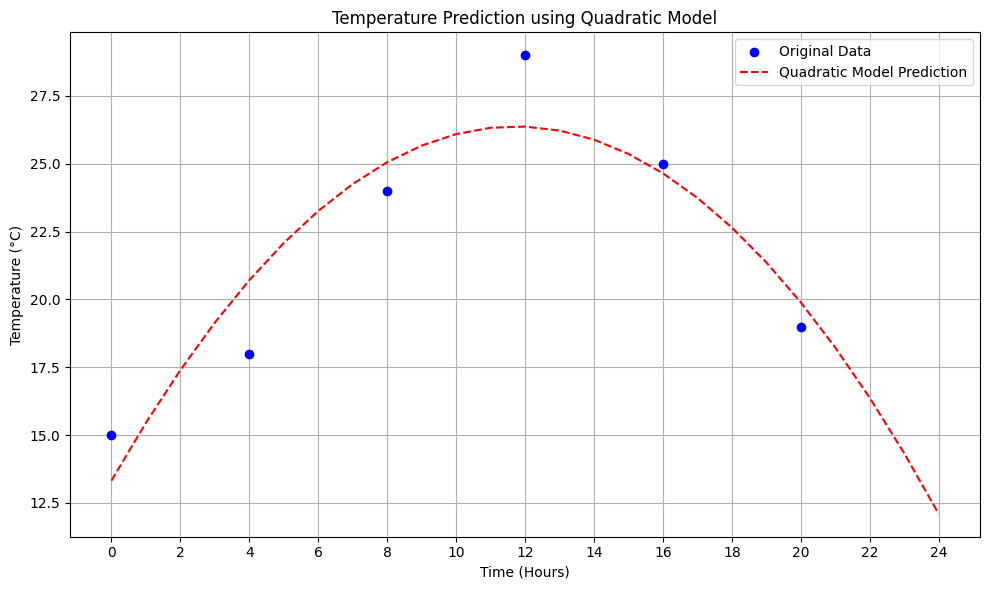

In [ ]:
import numpy as np
# Step 1: Input Data
time = np.array([0, 4, 8, 12, 16, 20])  # Time in hours
temperature = np.array([15, 18, 24, 29, 25, 19])  # Temperature in °C

# Step 2: Fit the quadratic model T(t) = a*t^2 + b*t + c
coefficients = np.polyfit(time, temperature, 2)
a, b, c = coefficients

print(f"\nDeveloped Quadratic Model:\nT(t) = {a:.4f}t² + {b:.4f}t + {c:.4f}\n")

# Step 3: Predict temperature for every hour from 0 to 24
t_values = np.arange(0, 25, 1)  # Time from 0 to 24 hours
predicted_temp = a * t_values**2 + b * t_values + c

print("Predicted Temperature (°C) for 24 Hours:\n")
for t, temp in zip(t_values, predicted_temp):
    print(f"At {t:02d}:00 hrs -> {temp:.2f} °C")

# Step 4: Plot only if matplotlib is installed
try:
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    plt.scatter(time, temperature, color='blue', label='Original Data', zorder=5)
    plt.plot(t_values, predicted_temp, color='red', linestyle='--', label='Quadratic Model Prediction')
    plt.title('Temperature Prediction using Quadratic Model')
    plt.xlabel('Time (Hours)')
    plt.ylabel('Temperature (°C)')
    plt.xticks(np.arange(0, 25, 2))
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

except ImportError:
    print("\nNOTE: 'matplotlib' is not installed. Skipping graph display.")
    print("To install it, run: pip install matplotlib")
